In [143]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [144]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [145]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [146]:
# pre-processing
def get_dias_fechados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-02-12', '2018-02-13', '2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (vesperas_dia_festivo_current[j] != get_dias_festivos()[o]):
                    vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (pos_dia_festivo_current[j] != get_dias_festivos()[o]):
                    pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

# preprocessing
df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA'], dayfirst=True)))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=3, column='ABERTO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=4, column='FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=5, column='DS', value=(~pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=6, column='DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=7, column='VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=8, column='POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=9, column='DATA_NAO_FESTIVA', value=((~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos()))).astype(int))
df.insert(loc=10, column='FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=11, column='NAO_FERIADO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=12, column='IS_SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=13, column='SEMANA_DE_NAO_PAGAMENTO', value=(~pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=14, column='BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=15, column='ALTA_TEMPORADA', value=(~pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=16, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=17, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=18, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=19, column='UMIDADE', value=(df_temp['UMIDADE']))

# removing outliers
df = df.query('FECHADO == 0 and ABERTO == 1')
df = df.drop(columns=['FECHADO', 'ABERTO'])

In [147]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'IS_SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# standardization & normalization
X = preprocessing.scale(X)

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, stratify=None)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 751
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     733 non-null    datetime64[ns]
 1   VENDAS                   733 non-null    int64         
 2   FDS                      733 non-null    int64         
 3   DS                       733 non-null    int64         
 4   DATA_FESTIVA             733 non-null    int64         
 5   VESPERA_DATA_FESTIVA     733 non-null    int64         
 6   POS_DATA_FESTIVA         733 non-null    int64         
 7   DATA_NAO_FESTIVA         733 non-null    int64         
 8   FERIADO                  733 non-null    int64         
 9   NAO_FERIADO              733 non-null    int64         
 10  IS_SEMANA_PAGAMENTO      733 non-null    int64         
 11  SEMANA_DE_NAO_PAGAMENTO  733 non-null    int64         
 12  BAIXA_TEMPORADA          733 non-nul

In [149]:
df.min()

DATA                       2018-02-14 00:00:00
VENDAS                                      59
FDS                                          0
DS                                           0
DATA_FESTIVA                                 0
VESPERA_DATA_FESTIVA                         0
POS_DATA_FESTIVA                             0
DATA_NAO_FESTIVA                             0
FERIADO                                      0
NAO_FERIADO                                  0
IS_SEMANA_PAGAMENTO                          0
SEMANA_DE_NAO_PAGAMENTO                      0
BAIXA_TEMPORADA                              0
ALTA_TEMPORADA                               0
QTD_CONCORRENTES                             7
PRECIPITACAO                                 0
TEMPERATURA                               10.9
UMIDADE                                  48.75
dtype: object

In [150]:
df.max()

DATA                       2020-03-06 00:00:00
VENDAS                                     261
FDS                                          1
DS                                           1
DATA_FESTIVA                                 1
VESPERA_DATA_FESTIVA                         1
POS_DATA_FESTIVA                             1
DATA_NAO_FESTIVA                             1
FERIADO                                      1
NAO_FERIADO                                  1
IS_SEMANA_PAGAMENTO                          1
SEMANA_DE_NAO_PAGAMENTO                      1
BAIXA_TEMPORADA                              1
ALTA_TEMPORADA                               1
QTD_CONCORRENTES                            13
PRECIPITACAO                              79.4
TEMPERATURA                                 39
UMIDADE                                     97
dtype: object

In [151]:
df.mean()

VENDAS                     127.575716
FDS                          0.285130
DS                           0.714870
DATA_FESTIVA                 0.005457
VESPERA_DATA_FESTIVA         0.051842
POS_DATA_FESTIVA             0.030014
DATA_NAO_FESTIVA             0.918145
FERIADO                      0.023192
NAO_FERIADO                  0.976808
IS_SEMANA_PAGAMENTO          0.302865
SEMANA_DE_NAO_PAGAMENTO      0.697135
BAIXA_TEMPORADA              0.177353
ALTA_TEMPORADA               0.822647
QTD_CONCORRENTES            10.032742
PRECIPITACAO                 4.036426
TEMPERATURA                 26.138745
UMIDADE                     75.890518
dtype: float64

In [152]:
df.median()

VENDAS                     128.00
FDS                          0.00
DS                           1.00
DATA_FESTIVA                 0.00
VESPERA_DATA_FESTIVA         0.00
POS_DATA_FESTIVA             0.00
DATA_NAO_FESTIVA             1.00
FERIADO                      0.00
NAO_FERIADO                  1.00
IS_SEMANA_PAGAMENTO          0.00
SEMANA_DE_NAO_PAGAMENTO      1.00
BAIXA_TEMPORADA              0.00
ALTA_TEMPORADA               1.00
QTD_CONCORRENTES            10.00
PRECIPITACAO                 0.00
TEMPERATURA                 26.60
UMIDADE                     75.75
dtype: float64

In [153]:
df.std()

VENDAS                     26.420803
FDS                         0.451784
DS                          0.451784
DATA_FESTIVA                0.073720
VESPERA_DATA_FESTIVA        0.221859
POS_DATA_FESTIVA            0.170741
DATA_NAO_FESTIVA            0.274331
FERIADO                     0.150617
NAO_FERIADO                 0.150617
IS_SEMANA_PAGAMENTO         0.459811
SEMANA_DE_NAO_PAGAMENTO     0.459811
BAIXA_TEMPORADA             0.382228
ALTA_TEMPORADA              0.382228
QTD_CONCORRENTES            1.189213
PRECIPITACAO                9.874036
TEMPERATURA                 5.737748
UMIDADE                    10.488693
dtype: float64

In [154]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


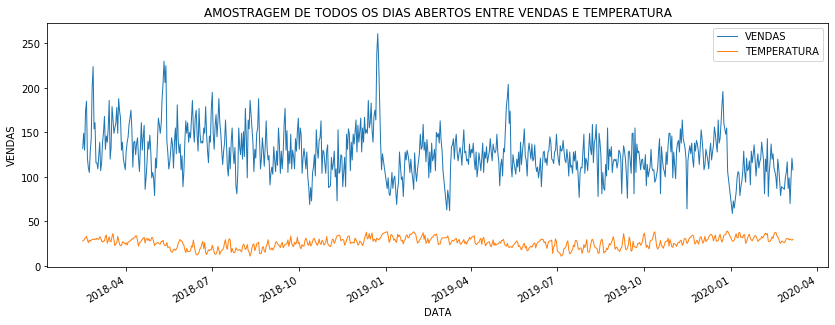

In [155]:
import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt
mpld3.enable_notebook()

df.plot(y=['VENDAS', 'TEMPERATURA'], x='DATA', figsize=(14, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS OS DIAS ABERTOS ENTRE VENDAS E TEMPERATURA')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

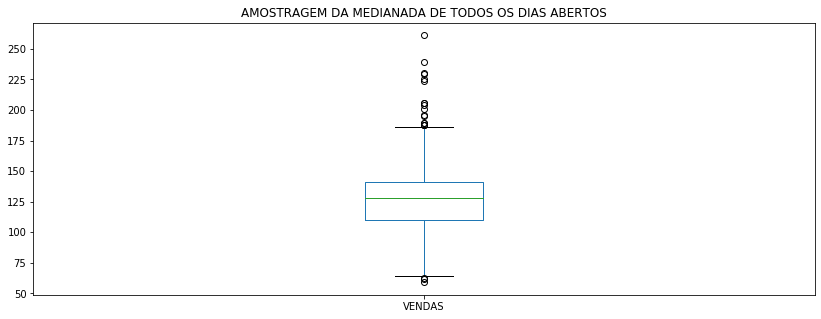

In [156]:
df.plot(y='VENDAS', x='DATA', figsize=(14, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANADA DE TODOS OS DIAS ABERTOS')
plt.show()

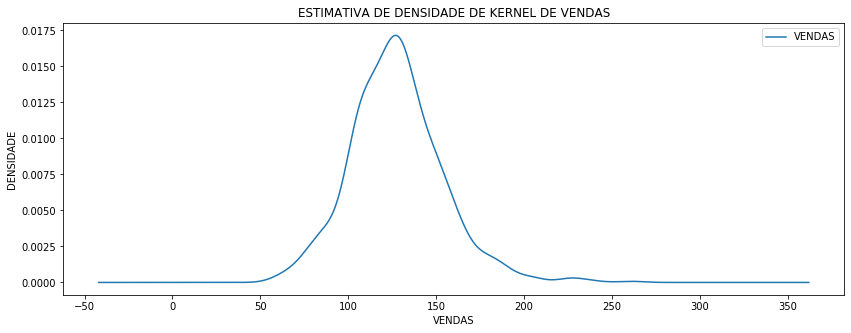

In [157]:
df.plot(y='VENDAS', x='DATA', figsize=(14, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

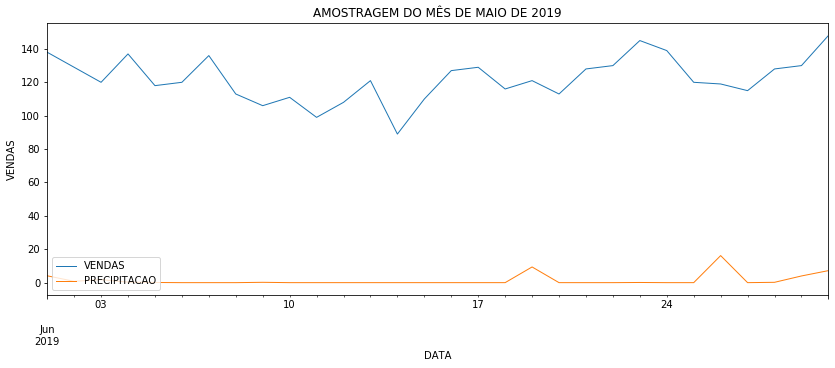

In [158]:
query = (df['DATA'] >= "2019-06-01") & (df['DATA'] <= "2019-06-30")
df2 = df.loc[query]
df2.sort_values(by=['DATA'], inplace=True, ascending=True)
df2.plot(y=['VENDAS', 'PRECIPITACAO'], x='DATA', figsize=(14, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=3)
plt.title('AMOSTRAGEM DO MÊS DE MAIO DE 2019')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

In [160]:
# # imports
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly
# import plotly.graph_objs as go
# import plotly.offline as py
# import seaborn as sns

# # configs
# py.init_notebook_mode()

# # feature enginerring
# train_df = df.drop(columns=['IS_FDS', 'IS_FERIADO', 'IS_DATA_FESTIVA', 'IS_VESPERA_DATA_FESTIVA', 'IS_POS_DATA_FESTIVA', 'IS_SEMANA_PAGAMENTO', 'IS_BAIXA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])
# train_df = df.rename(columns={'DATA': 'ds', 'VENDAS': 'y'})

# # model training
# model = Prophet(daily_seasonality=True)
# model.fit(train_df)

# # future prediction
# future = model.make_future_dataframe(periods=30)
# forecast = model.predict(future.rename(columns={'Datetime':'ds'}))

# # plot
# f, ax = plt.subplots(1)
# f.set_figheight(5)
# f.set_figwidth(15)
# fig = model.plot(forecast, ax=ax)
# plt.show()